In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import preprocess_kgptalkie as ps

In [2]:
df = pd.read_csv('https://github.com/laxmimerit/All-CSV-ML-Data-Files-Download/raw/master/IMDB-Dataset.csv')

In [3]:
df.shape

(50000, 2)

In [4]:
df.columns

Index(['review', 'sentiment'], dtype='object')

In [5]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


#### Preprocessing

In [8]:
df['char_counts'] = df['review'].apply(lambda x: ps.char_count(x))

In [9]:
df['stopwords_counts'] = df['review'].apply(lambda x: ps.stop_words_count(x))

In [10]:
df['avg_wordlength'] = df['review'].apply(lambda x: ps.avg_word_len(x))

In [11]:
df['word_counts'] = df['review'].apply(lambda x: ps.word_count(x))

In [12]:
df['review'] = df['review'].apply(lambda x: ps.remove_html_tags(x))

C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


In [13]:
df['review'] = df['review'].str.lower()

In [15]:
df['review_without_stopwords'] = df['review'].apply(lambda x: ps.remove_stop_words(x))


In [16]:
df.head()

,review,sentiment,word_counts,char_counts,stopwords_counts,avg_wordlength,review_without_stopwords
0,one of the other reviewers has mentioned that ...,positive,307,1455,147,4.739414,reviewers mentioned watching 1 oz episode you'...
1,a wonderful little production. the filming tec...,positive,162,837,75,5.166667,wonderful little production. filming technique...
2,i thought this was a wonderful way to spend ti...,positive,166,761,87,4.584337,thought wonderful way spend time hot summer we...
3,basically there's a family where a little boy ...,negative,138,611,67,4.427536,basically there's family little boy (jake) thi...
4,"petter mattei's ""love in the time of money"" is...",positive,230,1088,111,4.730435,"petter mattei's ""love time money"" visually stu..."


In [17]:
df.columns

Index(['review', 'sentiment', 'word_counts', 'char_counts', 'stopwords_counts',
       'avg_wordlength', 'review_without_stopwords'],
      dtype='object')

Text(0.5, 1.0, 'word counts')

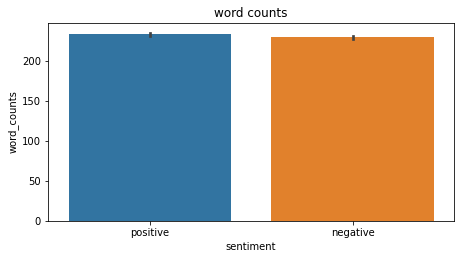

In [19]:
import seaborn as sns

plt.figure(figsize=(16,8))

plt.subplot(2,2,1)
sns.barplot(x='sentiment', y='word_counts', data=df)
plt.title('word counts')


Text(0.5, 1.0, 'Word counts')

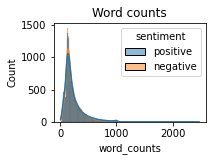

In [20]:
plt.subplot(2,2,1)
sns.histplot(data=df, x='word_counts', hue='sentiment', kde=True)
plt.title('Word counts')


Text(0.5, 1.0, 'Char counts')

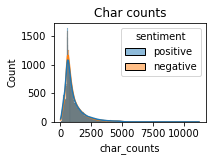

In [21]:
plt.subplot(2,2,2)
sns.histplot(data=df, x='char_counts', hue='sentiment', kde=True)
plt.title('Char counts')

Text(0.5, 1.0, 'Avg Word Length')

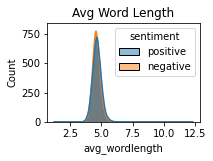

In [22]:
plt.subplot(2,2,3)
sns.histplot(data=df, x='avg_wordlength', hue='sentiment', kde=True)
plt.title('Avg Word Length')

Text(0.5, 1.0, 'Stopwords counts')

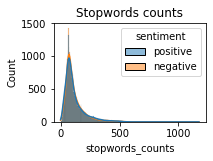

In [23]:
plt.subplot(2,2,4)
sns.histplot(data=df, x='stopwords_counts', hue='sentiment', kde=True)
plt.title('Stopwords counts')

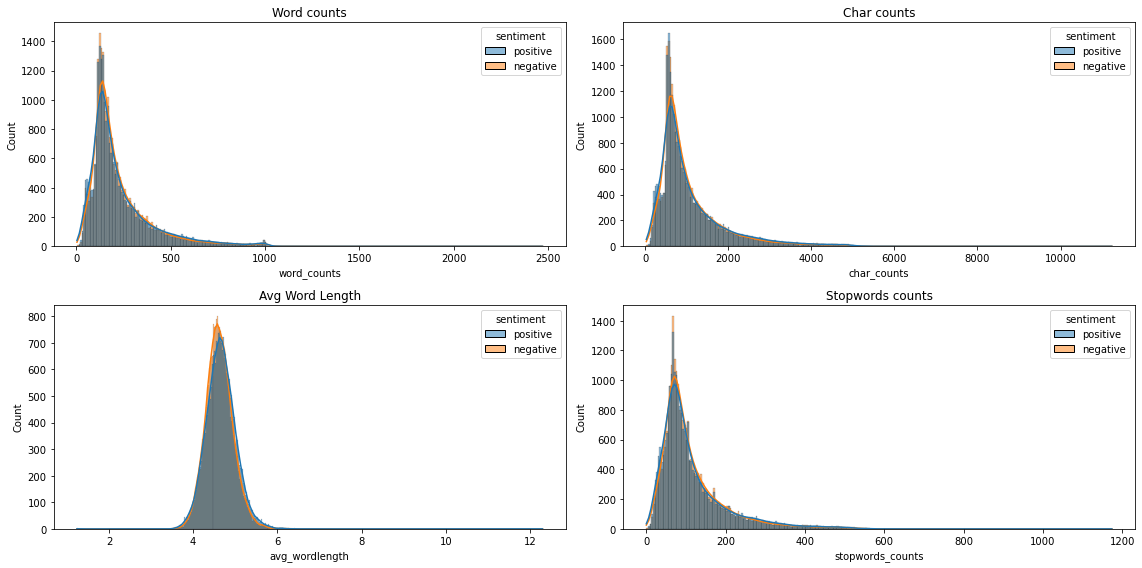

In [24]:
plt.figure(figsize=(16,8))

plt.subplot(2,2,1)
# sns.barplot(x='sentiment', y='word_counts', data=df)
sns.histplot(data=df, x='word_counts', hue='sentiment', kde=True)
plt.title('Word counts')

plt.subplot(2,2,2)
sns.histplot(data=df, x='char_counts', hue='sentiment', kde=True)
plt.title('Char counts')

plt.subplot(2,2,3)
sns.histplot(data=df, x='avg_wordlength', hue='sentiment', kde=True)
plt.title('Avg Word Length')

plt.subplot(2,2,4)
sns.histplot(data=df, x='stopwords_counts', hue='sentiment', kde=True)
plt.title('Stopwords counts')

plt.tight_layout()
plt.show()

#### train test split -> tfidf -> ml algo -> fit -> prediction -> evaluation

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix


In [27]:
X_train, X_test, y_train, y_test = train_test_split(df['review'],
                                                    df['sentiment'],
                                                   test_size=0.2,
                                                   random_state=0,
                                                   stratify=df['sentiment'])

In [28]:
X_train.shape, X_test.shape

((40000,), (10000,))

In [29]:
clf = Pipeline([('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])


In [30]:
clf.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

In [31]:
clf

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

In [32]:
X_train

38414    the notion of marital fidelity portrayed in th...
24010    what a good film! made men is a great action m...
29873    joe don baker. he was great in "walking tall" ...
2868     monarch cove was one of the best friday night'...
15107    this film is so unbelievable; - the whole prem...
                               ...                        
26219    in luchino visconti's film death in venice, it...
46599    total disgrace! truly awful! the screenplay an...
36788    this is yet another gem from the pen of daniel...
5038     i saw this movie when it first came out. it wa...
6732     this show is so full of action, and everything...
Name: review, Length: 40000, dtype: object

In [33]:
y_pred = clf.predict(X_test)

In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.91      0.89      0.90      5000
    positive       0.89      0.91      0.90      5000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

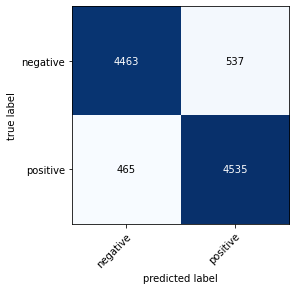

In [36]:
from mlxtend.plotting import plot_confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, class_names=clf.classes_)

In [37]:
clf.predict(['wow, this is amazing lesson'])

array(['positive'], dtype=object)

In [38]:
clf.predict(['wow, this sucks'])

array(['negative'], dtype=object)

In [41]:
clf.predict(['please read it this amazing book'])

array(['positive'], dtype=object)

In [42]:
import pickle

pickle.dump(clf, open('sentiment_analysis.pkl', 'wb'))